In [3]:
#importing important packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score

import imblearn
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

import xgboost as xgb
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore

import joblib

IMPORTING **DATASET**

In [7]:
#reading the dataset
df=pd.read_csv("train.csv")
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [8]:
df.shape

(45211, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [10]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

*** FOR EACH COLUMN***
1. Checking unique value, null value, outliers
2. Checking correct data type

In [11]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [12]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [13]:
df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [14]:
df['job']=df['job'].replace('unknown','blue-collar')


In [15]:
df.job.value_counts()

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [16]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
#df.marital.value_counts()

In [17]:
df.education_qual.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [18]:
df.education_qual.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

In [19]:
df['education_qual']=df['education_qual'].replace('unknown','secondary')
df.education_qual.value_counts()

secondary    25059
tertiary     13301
primary       6851
Name: education_qual, dtype: int64

In [20]:
df.call_type.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [21]:
df.call_type.value_counts()  #unkown call type high, so no treating the unknown

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [22]:
df.mon.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [23]:
df.prev_outcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [24]:
df.prev_outcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [25]:
df.day.unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

In [26]:
df.dur.unique()

array([ 261,  151,   76, ..., 1298, 1246, 1556])

In [27]:
df.dur.describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: dur, dtype: float64

In [28]:
df.num_calls.unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [29]:
df.num_calls.describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: num_calls, dtype: float64

In [30]:
# removing outliers
iqr=df.num_calls.quantile(0.75)-df.num_calls.quantile(0.25)
print("IQR : ",iqr)
upper=df.num_calls.quantile(0.75)+(1.5*iqr)
lower=df.num_calls.quantile(0.75)-(1.5*iqr)
print("Upper :", upper, "Lower :",lower)

print("Sum of num of call above Upper thershold :", sum(df.num_calls>upper))

df.num_calls=df.num_calls.clip(lower,upper)
df.num_calls.describe()

IQR :  2.0
Upper : 6.0 Lower : 0.0
Sum of num of call above Upper thershold : 3064


count    45211.000000
mean         2.392228
std          1.600111
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_calls, dtype: float64

In [31]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [32]:
# Datatype
df['y']=df['y'].map({'yes':1, 'no':0})
#df['target']=df.y

In [33]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,secondary,unknown,5,may,92,1,unknown,0
4,33,blue-collar,single,secondary,unknown,5,may,198,1,unknown,0


DATA CLEANING

In [34]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [35]:
df=df.dropna()

In [36]:
df=df.drop_duplicates()

In [37]:
df.shape

(45202, 11)

**EDA AND DATA ENCODING**

***FEATURE V/S DATA***

Text(0, 0.5, 'TARGET')

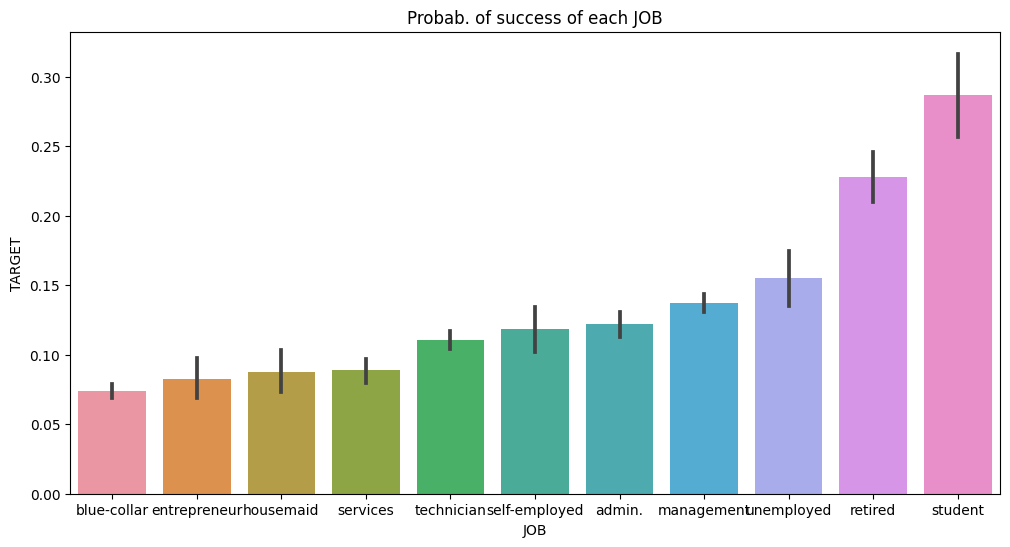

In [38]:
#PLOTTING CONVERSION RATE : JOB
job_conversion_rates = df.groupby('job')['y'].mean()
sorted_jobs = job_conversion_rates.reset_index().sort_values('y')['job']
plt.figure(figsize=(12,6))
plt.title('Probab. of success of each JOB')
sns.barplot(x='job', y='y', data=df, order=sorted_jobs)
plt.xlabel("JOB")
plt.ylabel("TARGET")

In [39]:
# Label encoding
df['job']=df['job'].map({'blue-collar':0, 'entrepreneur':1, 'housemaid':2, 'services':3, 'technician':4,'self-employed':5,
                         'admin.':6, 'management':7, 'unemployed':8, 'retired':9, 'student':10})

Text(0, 0.5, 'TARGET')

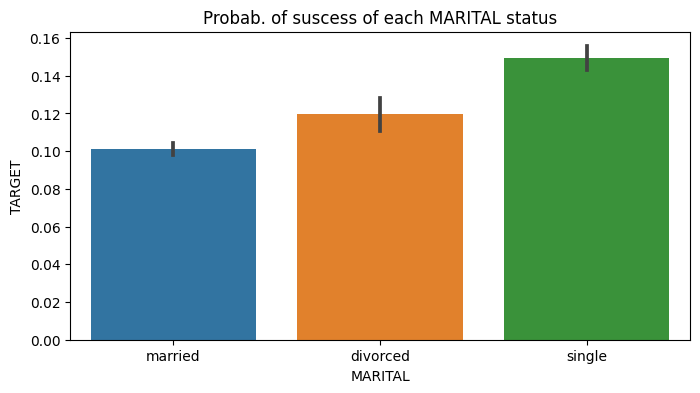

In [40]:
#PLOTTING CONVERSION RATE :Marital
job_conversion_rates=df.groupby('marital')['y'].mean()
sorted_jobs=job_conversion_rates.reset_index().sort_values('y')['marital']
plt.figure(figsize=(8,4))
plt.title('Probab. of suscess of each MARITAL status')
sns.barplot(x='marital', y='y', data=df, order=sorted_jobs)
plt.xlabel("MARITAL")
plt.ylabel("TARGET")

In [41]:
# Label encoding
df['marital']=df['marital'].map({'married':0, 'divorced':1, 'single':2})

Text(0, 0.5, 'TARGET')

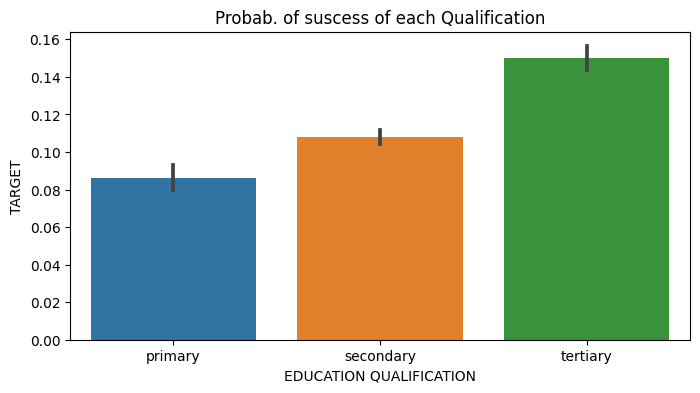

In [42]:
#PLOTTING CONVERSION RATE :EDUCATION QUALIFICATION
job_conversion_rates = df.groupby('education_qual')['y'].mean()
sorted_jobs = job_conversion_rates.reset_index().sort_values('y')['education_qual']
plt.figure(figsize=(8,4))
plt.title('Probab. of suscess of each Qualification')
sns.barplot(x='education_qual', y='y', data=df, order=sorted_jobs)
plt.xlabel("EDUCATION QUALIFICATION")
plt.ylabel("TARGET")

In [43]:
# Label encoding
df['education_qual']=df['education_qual'].map({'primary':0, 'secondary':1, 'tertiary':2})

Text(0, 0.5, 'TARGET')

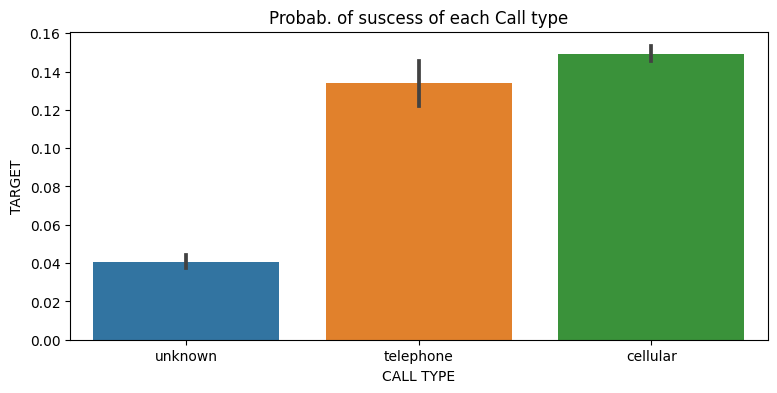

In [44]:
#PLOTTING CONVERSION RATE : CALL TYPE
job_conversion_rates = df.groupby('call_type')['y'].mean()
sorted_jobs = job_conversion_rates.reset_index().sort_values('y')['call_type']
plt.figure(figsize=(9,4))
plt.title('Probab. of suscess of each Call type')
sns.barplot(x='call_type', y='y', data=df, order=sorted_jobs)
plt.xlabel("CALL TYPE")
plt.ylabel("TARGET")

In [45]:
# Label encoding
df['call_type']=df['call_type'].map({'unknown':0, 'telephone':1, 'cellular':2})

Text(0, 0.5, 'TARGET')

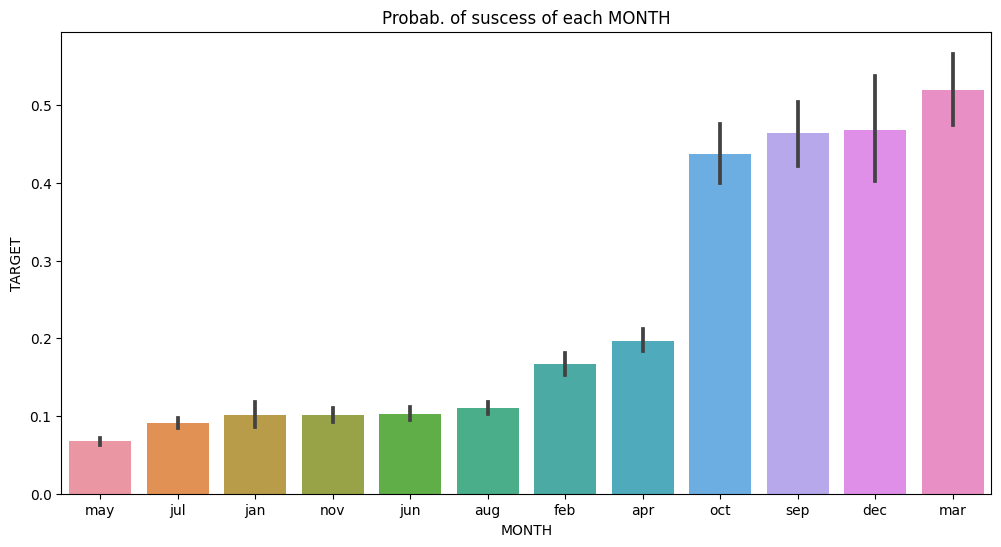

In [46]:
#PLOTTING CONVERSION RATE : MONTH
job_conversion_rates = df.groupby('mon')['y'].mean()
sorted_jobs = job_conversion_rates.reset_index().sort_values('y')['mon']
plt.figure(figsize=(12,6))
plt.title('Probab. of suscess of each MONTH')
sns.barplot(x='mon', y='y', data=df, order=sorted_jobs)
plt.xlabel("MONTH")
plt.ylabel("TARGET")

In [47]:
# Label encoding
df['mon']=df['mon'].map({'may':0, 'jul':1, 'jan':2, 'nov':3, 'jun':4, 'aug':5,
                         'feb':6, 'apr':7, 'oct':8, 'sep':9, 'dec':10, 'mar':11})

Text(0, 0.5, 'TARGET')

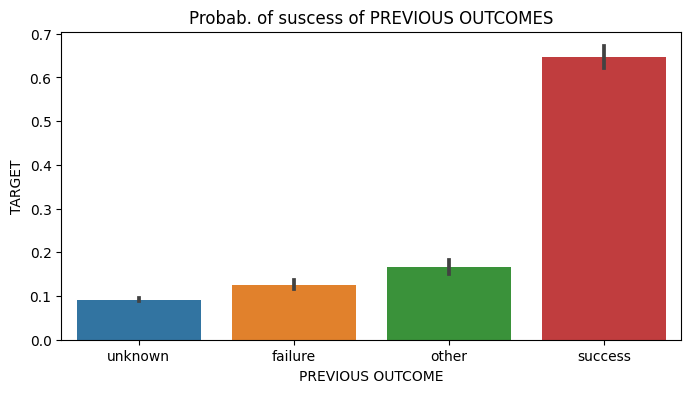

In [48]:
#PLOTTING CONVERSION RATE : PREVIOUS OUTCOME
job_conversion_rates = df.groupby('prev_outcome')['y'].mean()
sorted_jobs = job_conversion_rates.reset_index().sort_values('y')['prev_outcome']
plt.figure(figsize=(8,4))
plt.title('Probab. of suscess of PREVIOUS OUTCOMES')
sns.barplot(x='prev_outcome', y='y', data=df, order=sorted_jobs)
plt.xlabel("PREVIOUS OUTCOME")
plt.ylabel("TARGET")

In [49]:
# Label encoding
df['prev_outcome']=df['prev_outcome'].map({'unknown':0, 'failure':1, 'other':2, 'success':3})

Plotting numerical columns

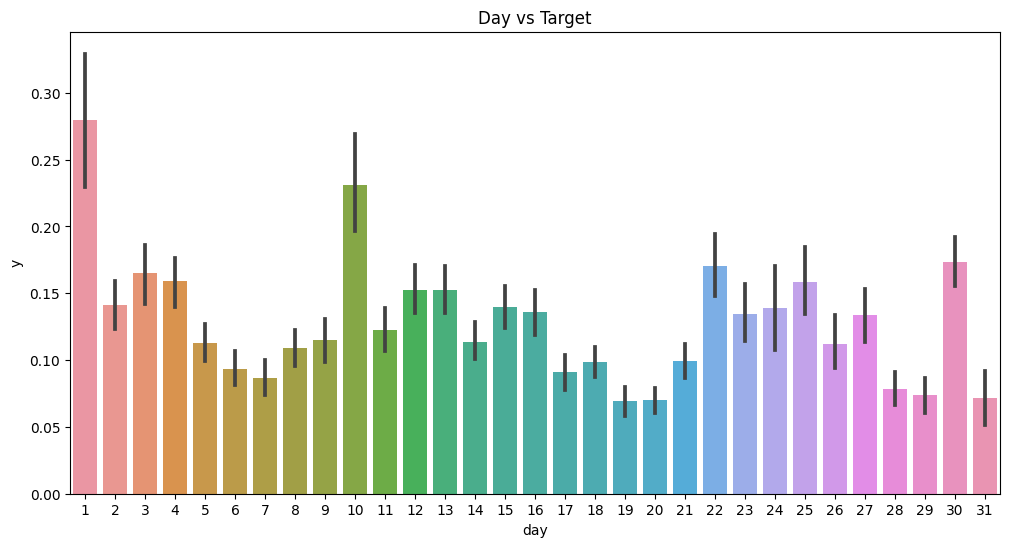

In [50]:
#Plotting Day column
plt.figure(figsize=(12,6))
sns.barplot(x='day', y='y', data=df, order=df.groupby('day')['y'].mean().reset_index().sort_values('day')['day'])
plt.title("Day vs Target")
plt.show()

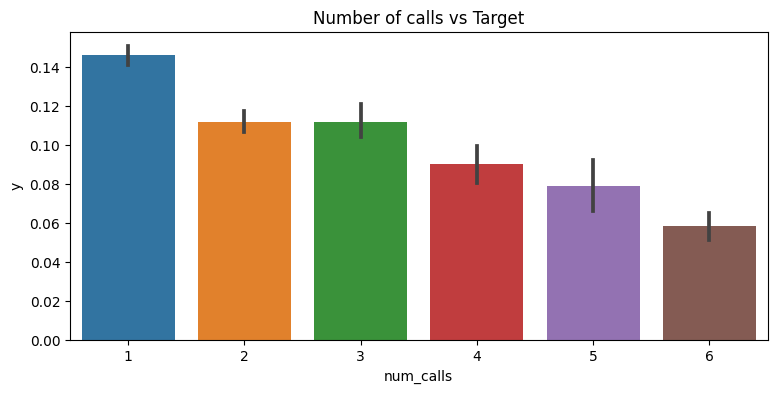

In [51]:
#Plotting Number of calls column
plt.figure(figsize=(9,4))
sns.barplot(x='num_calls', y='y', data=df, order=df.groupby('num_calls')['y'].mean().reset_index().sort_values('num_calls')['num_calls'])
plt.title("Number of calls vs Target")
plt.show()

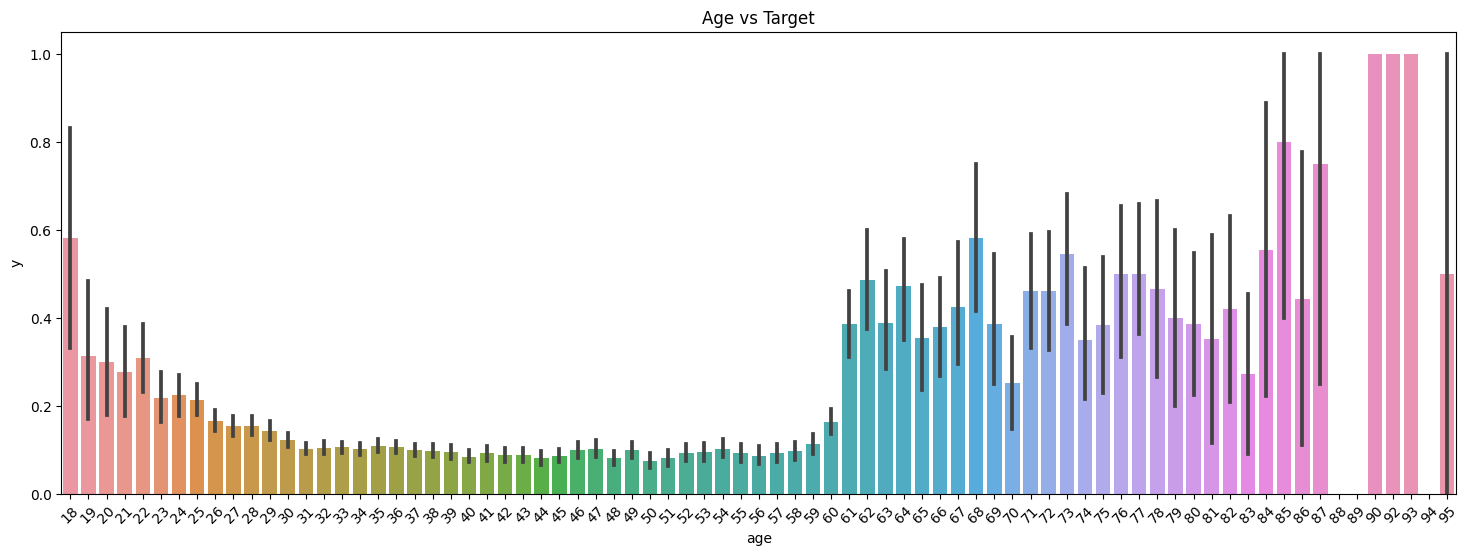

In [52]:
#Plotting Age column
plt.figure(figsize=(18,6))
sns.barplot(x='age', y='y', data=df, order=df.groupby('age')['y'].mean().reset_index().sort_values('age')['age'])
plt.title("Age vs Target")
plt.xticks(rotation=45)
plt.show()

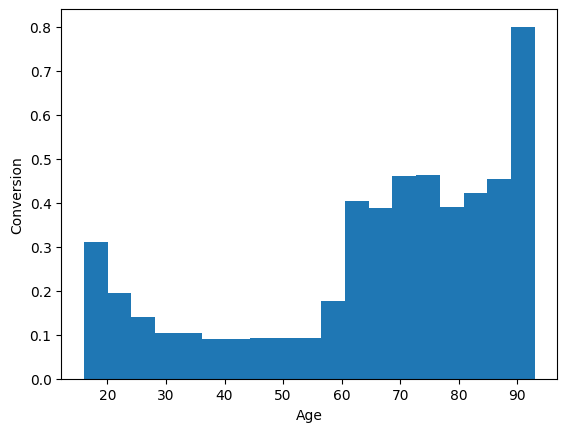

In [53]:
bins=np.linspace(df.age.min(),df.age.max(),20)
c=np.digitize(df.age,bins)
plt.bar(bins[:-1], [np.mean(df.y.values[c == i]) for i in range(1, len(bins))], width = bins[1] - bins[0])
plt.xlabel("Age")
plt.ylabel("Conversion")
plt.show()

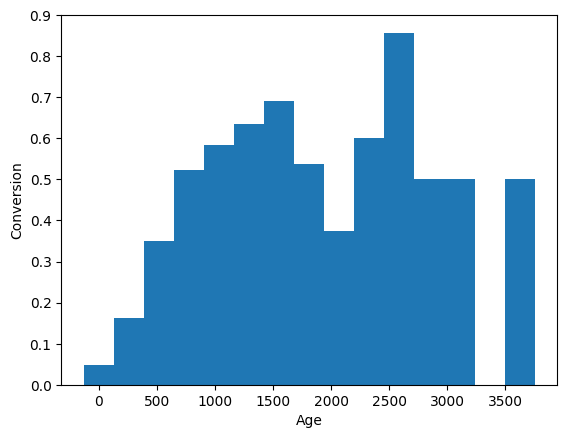

In [54]:
bins=np.linspace(df.dur.min(),df.dur.max(),20)
c=np.digitize(df.dur,bins)
plt.bar(bins[:-1], [np.mean(df.y.values[c == i]) for i in range(1, len(bins))], width = bins[1] - bins[0])
plt.xlabel("Age")
plt.ylabel("Conversion")
plt.show()

# TARGET & FEATURE

---

# X AND Y


In [55]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,7,0,2,0,5,0,261,1,0,0
1,44,4,2,1,0,5,0,151,1,0,0
2,33,1,0,1,0,5,0,76,1,0,0
3,47,0,0,1,0,5,0,92,1,0,0
4,33,0,2,1,0,5,0,198,1,0,0


In [56]:
X=df[['age','job','marital','education_qual','call_type','day','mon','dur','num_calls','prev_outcome']].values
y=df['y'].values

In [57]:
df['y'].value_counts()

0    39913
1     5289
Name: y, dtype: int64

Imbalanced data

**Splitting, Balancing & Scaling the data**

In [58]:
#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=0, stratify=y)

In [59]:
#Balancing the data
smt=SMOTEENN(sampling_strategy='all')
x_train,y_train=smt.fit_resample(x_train,y_train)

In [60]:
np.array(np.unique(y_train, return_counts=True)).T

array([[    0, 21931],
       [    1, 28459]])

**MODELLING**

***XGBOOST Algorithm***

In [61]:
for i in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,0.9,1.0]:
  model=xgb.XGBClassifier(learning_rate=i, n_estimators=100, verbosity=0)
  model.fit(x_train,y_train)
  model.score(x_test,y_test)

  print("Learning rate: ",i," Train Score: ",model.score(x_train,y_train)," CV Score: ",np.mean(cross_val_score(model, x_train, y_train, cv=10, scoring="f1")))

Learning rate:  0.01  Train Score:  0.9101210557650328  CV Score:  0.9173167796883825
Learning rate:  0.02  Train Score:  0.9207183965072435  CV Score:  0.9273624041927768
Learning rate:  0.03  Train Score:  0.9272673149434412  CV Score:  0.9334231079213755
Learning rate:  0.04  Train Score:  0.9329628894621949  CV Score:  0.9380484706375777
Learning rate:  0.05  Train Score:  0.9391545941655091  CV Score:  0.9419540229927257
Learning rate:  0.06  Train Score:  0.9445326453661441  CV Score:  0.9450721866229828
Learning rate:  0.07  Train Score:  0.9469736058741813  CV Score:  0.9482640587817258
Learning rate:  0.08  Train Score:  0.9499702321889264  CV Score:  0.9494297289429465
Learning rate:  0.09  Train Score:  0.951041873387577  CV Score:  0.9505133277468417
Learning rate:  0.1  Train Score:  0.953423298273467  CV Score:  0.9525269043554072
Learning rate:  0.11  Train Score:  0.95509029569359  CV Score:  0.9532684089010834
Learning rate:  0.12  Train Score:  0.9568366739432427  CV 

In [62]:
xgbc=xgb.XGBClassifier(learning_rate=0.9, n_estimators=100, verbosity=0)
xgbc.fit(x_train,y_train)
y_pred= xgbc.predict(x_test)

print("Test Accuracy Score: ", xgbc.score(x_test,y_test)) # accuracy
print("Training Accuracy Score: ", xgbc.score(x_train,y_train))
print("F1 Score:", f1_score(y_test,y_pred)) # f1 score

Test Accuracy Score:  0.8416954251836121
Training Accuracy Score:  0.9977971819805517
F1 Score: 0.5492567397329302


Feature Importance

In [63]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [64]:
x_test=pd.DataFrame(x_test, columns=['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
                                     'dur', 'num_calls', 'prev_outcome'])

xgbc=xgb.XGBClassifier(learning_rate=0.9, n_estimators=100, verbosity=0)
xgbc.fit(x_train,y_train)

importance=xgbc.feature_importances_
feature_importances=list(zip(importance,x_test.columns))
feature_importances.sort(key=lambda x:x[1], reverse=True)
for feature, importance in feature_importances:
  print(feature , ":" , importance)


0.10702225 : prev_outcome
0.07412508 : num_calls
0.14449216 : mon
0.041250773 : marital
0.042197276 : job
0.029047957 : education_qual
0.14368138 : dur
0.040844623 : day
0.34735957 : call_type
0.029978922 : age


In [65]:
fit_model=xgbc.fit(x_train,y_train)

In [66]:
joblib.dump(fit_model, 'xgb_model.pkl')

['xgb_model.pkl']